<a href="https://colab.research.google.com/github/alexguttlein/OrgaDatos_TP2_MachineLearning/blob/main/TP2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [141]:
sales_train = pd.read_csv('sales_train.csv')
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')

# Análisis inicial de los datasets

## Campos de datasets

In [ ]:
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [ ]:
item_categories.head(2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [ ]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [ ]:
shops.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


## Unión de datasets

In [ ]:
# se unen 'sales_train' con 'items' usando 'item_id'
merged = pd.merge(sales_train, items, on='item_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0.0,24.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0.0,27.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [ ]:
# se une el resultante anterior con 'item_categories' usando 'item_category_id'
merged = pd.merge(merged, item_categories, on='item_category_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0.0,24.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0.0,27.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [ ]:
# se une el resultante anterior con 'shops' usando 'shop_id'
merged = pd.merge(merged, shops, on='shop_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3.0,59.0,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8.0,59.0,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


## Limpieza de dataset

In [ ]:
merged.isna().sum()

date                  363
date_block_num        363
shop_id               363
item_id                 0
item_price            363
item_cnt_day          363
item_name               0
item_category_id        0
item_category_name      0
shop_name             363
dtype: int64

In [ ]:
merged.count()

date                  2935849
date_block_num        2935849
shop_id               2935849
item_id               2936212
item_price            2935849
item_cnt_day          2935849
item_name             2936212
item_category_id      2936212
item_category_name    2936212
shop_name             2935849
dtype: int64

In [ ]:
# se valida que los datos NaN provienen de los mismos 363 registros
merged.loc[merged['shop_id'].isna() | merged['shop_name'].isna() | merged['item_price'].isna() | merged['date'].isna() | merged['date_block_num'].isna()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2899288,NaN,NaN,NaN,13805,NaN,NaN,ЛЕВША (BD),37,Кино - Blu-Ray,NaN
2899289,NaN,NaN,NaN,14648,NaN,NaN,МИССИЯ НЕВЫПОЛНИМА ПЛЕМЯ ИЗГОЕВ (2BD),37,Кино - Blu-Ray,NaN
2899290,NaN,NaN,NaN,19775,NaN,NaN,ТРАНСФОРМЕРЫ (4BD),37,Кино - Blu-Ray,NaN
2899291,NaN,NaN,NaN,1253,NaN,NaN,ADELE 25 LP,58,Музыка - Винил,NaN
2899292,NaN,NaN,NaN,1679,NaN,NaN,BILLY`S BAND Парижские сезоны LP,58,Музыка - Винил,NaN
...,...,...,...,...,...,...,...,...,...,...
2899646,NaN,NaN,NaN,14972,NaN,NaN,Манга Переживая юность,47,"Книги - Комиксы, манга",NaN
2899647,NaN,NaN,NaN,8545,NaN,NaN,Артбук The Art Of Bubble,42,"Книги - Артбуки, энциклопедии",NaN
2899648,NaN,NaN,NaN,8549,NaN,NaN,Артбук Мир игры Rise Of The Tomb Raider,42,"Книги - Артбуки, энциклопедии",NaN
2899649,NaN,NaN,NaN,8551,NaN,NaN,Артбук Мир игры Total War,42,"Книги - Артбуки, энциклопедии",NaN


In [ ]:
# se filtran los 363 registros que contienen datos NaN
reg_nan = merged.loc[merged['shop_id'].isna() | merged['shop_name'].isna() | merged['item_price'].isna() | merged['date'].isna() | merged['date_block_num'].isna()]

In [ ]:
# se eliminan los 363 registros con datos NaN ya que se considera que no va a afectar el resultado del analisis
merged.drop(reg_nan.index, inplace=True)

In [ ]:
# se verifica que no quedan registros con valores NaN
merged.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [ ]:
# se verifica que hay registros con cantidad de ventas negativas
item_cnt_day_negativo = merged.loc[merged['item_cnt_day'] < 0]
item_cnt_day_negativo['item_cnt_day'].count()

7356

In [ ]:
# se reemplaza las ventas negativas por 0
merged.loc[merged['item_cnt_day'] < 0, 'item_cnt_day'] = 0

# Visualizaciones

In [ ]:
visu = merged.copy()

In [ ]:
# convierto la columna 'date' a datetime
visu['date'] = pd.to_datetime(visu['date'], format='%d.%m.%Y')

# se agrega feature de dia de la semana
visu['day_of_week'] = visu['date'].dt.dayofweek

# se agregar columna que indique si es día laboral o fin de semana
# 0 para día laboral (lunes a viernes), 1 para fin de semana (sábado y domingo)
visu['is_weekend'] = visu['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

## Pieplot

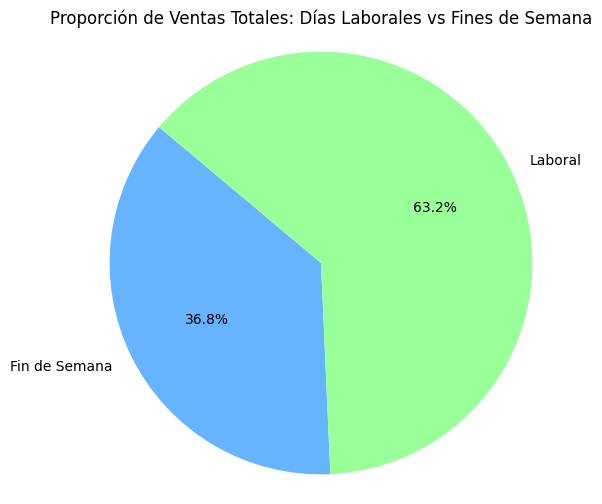

In [ ]:
# se ve la proporcion de ventas entre semana vs findes
visu['is_weekend_label'] = visu['is_weekend'].map({0: 'Laboral', 1: 'Fin de Semana'})

ventas_totales = visu.groupby('is_weekend_label')['item_cnt_day'].sum()

plt.figure(figsize=(6, 6))
plt.pie(ventas_totales, labels=ventas_totales.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Proporción de Ventas Totales: Días Laborales vs Fines de Semana')
plt.axis('equal')
plt.show()

## Barplots

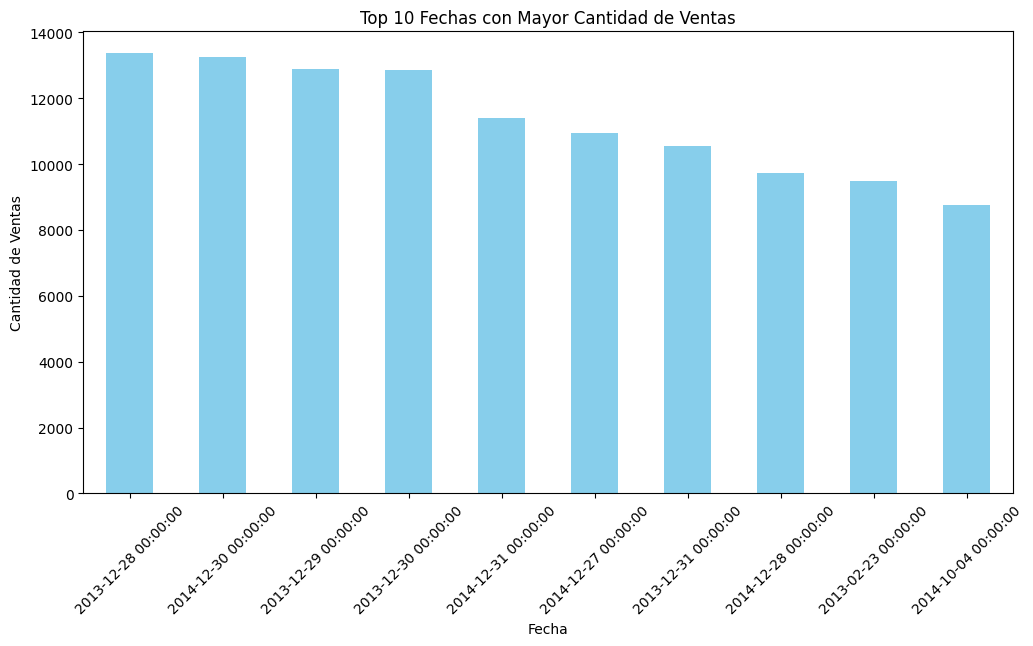

In [ ]:
# fechas con mayor cantidad de articulos vendidos
fechas_top_ventas = visu.groupby('date')['item_cnt_day'].sum().sort_values(ascending=False).head(10)

# barplot para las 10 fechas con mayor cantidad de ventas
plt.figure(figsize=(12, 6))
fechas_top_ventas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Fechas con Mayor Cantidad de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

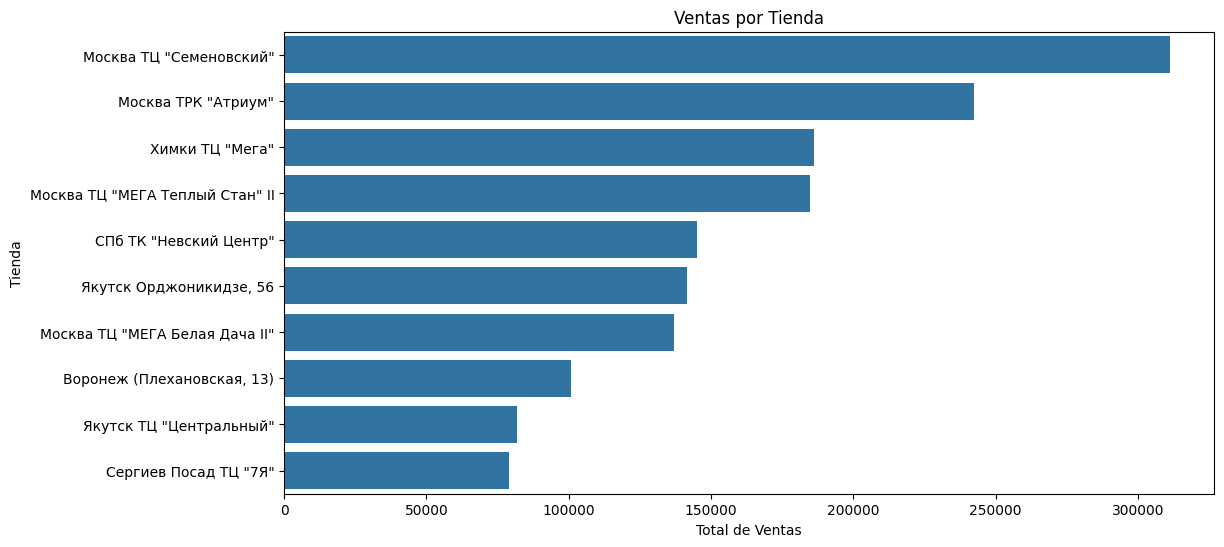

In [ ]:
# barplot de ventas por tienda
plt.figure(figsize=(12, 6))
ventas_por_tienda = visu.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ventas_por_tienda.values, y=ventas_por_tienda.index)
plt.title('Ventas por Tienda')
plt.xlabel('Total de Ventas')
plt.ylabel('Tienda')
plt.show()

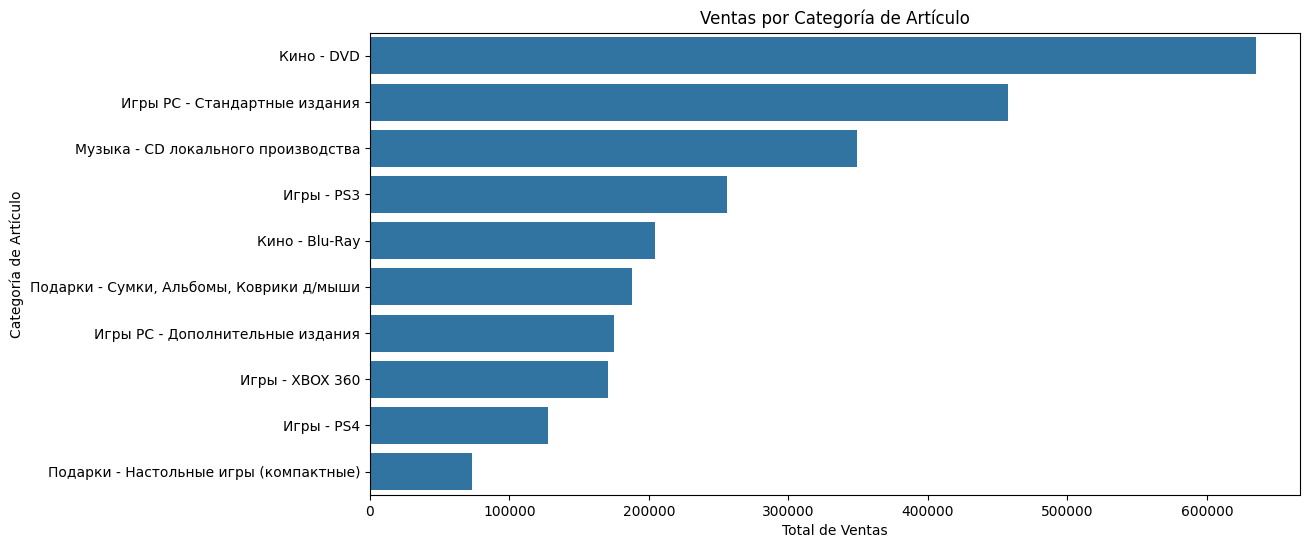

In [ ]:
# barplot de ventas por categoría de artículo
plt.figure(figsize=(12, 6))
ventas_por_categoria = visu.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ventas_por_categoria.values, y=ventas_por_categoria.index)
plt.title('Ventas por Categoría de Artículo')
plt.xlabel('Total de Ventas')
plt.ylabel('Categoría de Artículo')
plt.show()

# Agregado de features

In [142]:
df = merged.copy()

In [143]:
# convierto la columna 'date' a datetime
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# se agrega feature de numero de mes
df['month'] = df['date'].dt.month

In [144]:
# se agregan ventas totales por tienda por mes
total_vtas_shop_mes = df.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()
total_vtas_shop_mes.rename(columns={'item_cnt_day': 'total_vtas_shop_mes'}, inplace=True)
df = df.merge(total_vtas_shop_mes, on=['shop_id', 'date_block_num'], how='left')

In [145]:
# se agregan ventas totales de cada item por mes
total_vtas_item_mes = df.groupby(['item_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()
total_vtas_item_mes.rename(columns={'item_cnt_day': 'total_vtas_item_mes'}, inplace=True)
df = df.merge(total_vtas_item_mes, on=['item_id', 'date_block_num'], how='left')

In [146]:
# se agregan ventas totales por categoria por mes
total_vtas_cat_mes = df.groupby(['item_category_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()
total_vtas_cat_mes.rename(columns={'item_cnt_day': 'total_vtas_cat_mes'}, inplace=True)
df = df.merge(total_vtas_cat_mes, on=['item_category_id', 'date_block_num'], how='left')

In [147]:
# se agregan cantidad de ventas por comercio por mes
cant_vtas_mes = df.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].count().reset_index()
cant_vtas_mes.rename(columns={'item_cnt_day': 'cant_vtas_mes'}, inplace=True)
df = df.merge(cant_vtas_mes, on=['shop_id', 'date_block_num'], how='left')

In [148]:
# se agrupan por 'shop_id', 'item_id', y 'date_block_num' y se calcula el precio promedio
precio_prom_mes = df.groupby(['item_id', 'date_block_num'])['item_price'].mean().reset_index()
precio_prom_mes.rename(columns={'item_price': 'precio_prom_item_mes'}, inplace=True)

# se hace merge con el df original
df = df.merge(precio_prom_mes, on=['item_id', 'date_block_num'], how='left')

In [149]:
# se crea un df desplazado un mes hacia adelante para obtener el precio promedio del mes anterior
precio_prom_mes_ant = precio_prom_mes.copy()
precio_prom_mes_ant['date_block_num'] += 1
precio_prom_mes_ant.rename(columns={'precio_prom_item_mes': 'precio_prom_mes_ant'}, inplace=True)

# merge con el df original para obtener el precio promedio del mes anterior
df = df.merge(precio_prom_mes_ant, on=['item_id', 'date_block_num'], how='left')
df['precio_prom_mes_ant'].fillna(0, inplace=True)

In [150]:
# se calcula la diferencia entre el precio promedio actual y el del mes anterior
df['cambio_precio'] = df['precio_prom_item_mes'] - df['precio_prom_mes_ant']
df['cambio_precio'].fillna(0, inplace=True)

In [151]:
# se agregan ventas totales de cada item, por shop, por mes
total_vtas_item_shop_mes = df.groupby(['item_id', 'shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()
total_vtas_item_shop_mes.rename(columns={'item_cnt_day': 'total_vtas_item_shop_mes'}, inplace=True)
df = df.merge(total_vtas_item_shop_mes, on=['item_id', 'shop_id', 'date_block_num'], how='left')

In [152]:
df.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,month,total_vtas_shop_mes,total_vtas_item_mes,total_vtas_cat_mes,cant_vtas_mes,precio_prom_item_mes,precio_prom_mes_ant,cambio_precio,total_vtas_item_shop_mes
0,2013-01-02,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,2026.0,18.0,6132.0,1847,999.000000,0.000000,999.000000,1.0
1,2013-04-26,3.0,59.0,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",4,1390.0,5.0,6199.0,1271,309.600000,549.000000,-239.400000,1.0
2,2013-06-26,5.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",6,1712.0,32.0,6783.0,1465,279.114688,260.714286,18.400402,1.0
3,2013-07-20,6.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",7,1747.0,45.0,8644.0,1599,285.229302,279.114688,6.114615,1.0
4,2013-09-14,8.0,59.0,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",9,2012.0,36.0,7703.0,1580,301.970588,257.885250,44.085338,2.0


# Regresor Lineal

In [ ]:
df['date_block_num'].unique()

array([ 0.,  3.,  5.,  6.,  8.,  9., 10., 12., 14., 15., 16., 18., 20.,
       26.,  1., 30., 22., 23.,  7., 17., 25.,  4., 11., 24., 27.,  2.,
       19., 32., 13., 21., 28., 29., 31., 33.])

In [ ]:
# se verifica la cantidad total de registros para decidir donde separar train de validation
# se calcula cuantos registros serian el 20%
(df['date_block_num'].count())*0.2

587169.8

In [ ]:
# se determina que el corte deseado es en el mes 25
df.loc[df['date_block_num'] >= 25].count()

date                        523904
date_block_num              523904
shop_id                     523904
item_id                     523904
item_price                  523904
item_cnt_day                523904
item_name                   523904
item_category_id            523904
item_category_name          523904
shop_name                   523904
month                       523904
total_vtas_shop_mes         523904
total_vtas_item_mes         523904
total_vtas_cat_mes          523904
cant_vtas_mes               523904
precio_prom_item_mes        523904
precio_prom_mes_ant         523904
cambio_precio               523904
total_vtas_item_shop_mes    523904
dtype: int64

In [ ]:
# se usa 'date_block_num' para separar train de validation
# del 0 al 24 van a ser para entrenar y del 25 al 33 para validar

# se seleccionan los features y el target
features = ['date_block_num', 'item_price', 'item_category_id', 'total_vtas_shop_mes', 'total_vtas_item_mes',\
            'cambio_precio', 'precio_prom_item_mes', 'total_vtas_item_shop_mes', 'total_vtas_cat_mes', 'cant_vtas_mes']
target = 'item_cnt_day'

# se separa el conjunto de entrenamiento y validación/test
train = df[df['date_block_num'] < 25]  # Por ejemplo, usamos los primeros 20 meses para entrenar
validation = df[df['date_block_num'] >= 25]  # Usamos los meses restantes para validación/test

# se separan las características y el objetivo
X_train = train[features]
y_train = train[target]
X_validation = validation[features]
y_validation = validation[target]

# se normalizan los datos utilizando MinMaxScaler
scaler = MinMaxScaler()

# se ajusta y transforman los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# se transforman los datos de validación/test
X_validation_scaled = scaler.transform(X_validation)

# se entrena el modelo de regresión lineal con los datos normalizados
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# se predecir en el conjunto de validación normalizado
y_pred = model.predict(X_validation_scaled)

# Calcular el MSER
mser = mean_squared_error(y_validation, y_pred, squared = False)
mser

4.281814080501505

# Random Forest

In [ ]:
# se seleccionan los features y el target

features = ['date_block_num', 'item_price', 'item_category_id', 'total_vtas_shop_mes', 'total_vtas_item_mes',\
            'cambio_precio', 'precio_prom_item_mes', 'total_vtas_item_shop_mes', 'total_vtas_cat_mes', 'cant_vtas_mes']
target = 'item_cnt_day'

# se separa el conjunto de entrenamiento y validación/test
train = df[df['date_block_num'] < 25]  # Por ejemplo, usamos los primeros 20 meses para entrenar
validation = df[df['date_block_num'] >= 25]  # Usamos los meses restantes para validación/test

# Separar características y objetivo
X_train = train[features]
y_train = train[target]
X_validation = validation[features]
y_validation = validation[target]

# Normalizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de validación/test
X_validation_scaled = scaler.transform(X_validation)

## Entrenando Random Forest con 10 arboles

In [ ]:
# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=10, random_state=27)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=27)

In [ ]:
# Predecir en el conjunto de validación
y_pred = model.predict(X_validation_scaled)

In [ ]:
mser = mean_squared_error(y_validation, y_pred, squared = False)
mser

4.824065916972118

## Entrenando Random Forest con 20 arboles

In [ ]:
# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=20, random_state=27)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=20, random_state=27)

In [ ]:
# Predecir en el conjunto de validación
y_pred = model.predict(X_validation_scaled)

In [ ]:
mser = mean_squared_error(y_validation, y_pred, squared = False)
mser

4.59715069361726

## Entrenando Random Forest con 50 arboles

In [ ]:
# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=50, random_state=27)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=50, random_state=27)

In [ ]:
# Predecir en el conjunto de validación
y_pred = model.predict(X_validation_scaled)

In [ ]:
mser = mean_squared_error(y_validation, y_pred, squared = False)
mser

4.28714367265588

## Entrenando Random Forest con 10 arboles, 6 max features, 550 min_samples_split, 30 max_depth

In [ ]:
# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=10, random_state=27, max_features=6, min_samples_split=550, max_depth=30)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=30, max_features=6, min_samples_split=550,
                      n_estimators=10, random_state=27)

In [ ]:
# Predecir en el conjunto de validación
y_pred = model.predict(X_validation_scaled)

In [ ]:
mser = mean_squared_error(y_validation, y_pred, squared = False)
mser

3.6336452156317502

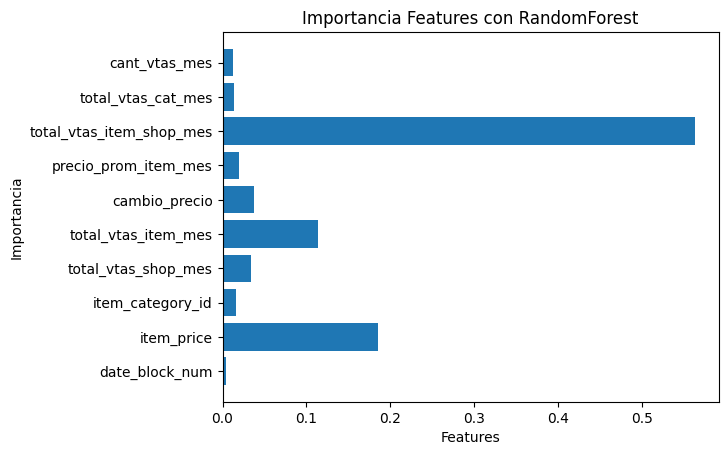

In [ ]:
# Importancia de features
model.feature_importances_

plt.barh(X_train.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RandomForest')
plt.show()

## Entrenando Random Forest con 10 arboles, 7 max features, 550 min_samples_split, 30 max_depth - (MEJOR RESULTADO)

In [ ]:
# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=10, random_state=27, max_features=7, min_samples_split=550, max_depth=30)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=30, max_features=7, min_samples_split=550,
                      n_estimators=10, random_state=27)

In [ ]:
# Predecir en el conjunto de validación
y_pred = model.predict(X_validation_scaled)

In [ ]:
mser = mean_squared_error(y_validation, y_pred, squared = False)
mser

3.506785860513299

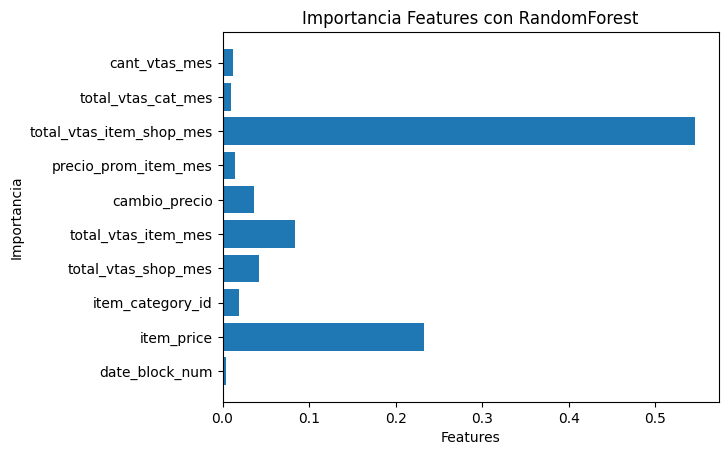

In [ ]:
# Importancia de features
model.feature_importances_

plt.barh(X_train.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RandomForest')
plt.show()

## Entrenando Random Forest con 10 arboles, 8 max features, 550 min_samples_split, 30 max_depth

In [ ]:
# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=10, random_state=27, max_features=8, min_samples_split=550, max_depth=30)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=30, max_features=8, min_samples_split=550,
                      n_estimators=10, random_state=27)

In [ ]:
# Predecir en el conjunto de validación
y_pred = model.predict(X_validation_scaled)

In [ ]:
mser = mean_squared_error(y_validation, y_pred, squared = False)
mser

3.775852710993482

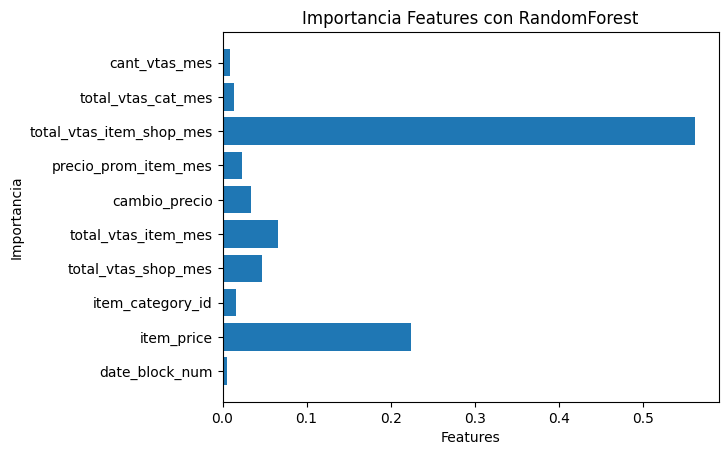

In [ ]:
# Importancia de features
model.feature_importances_

plt.barh(X_train.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RandomForest')
plt.show()

## Entrenando Random Forest con 20 arboles, 7 max features, 550 min_samples_split, 30 max_depth

In [ ]:
# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=20, random_state=27, max_features=7, min_samples_split=550, max_depth=30)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=30, max_features=7, min_samples_split=550,
                      n_estimators=20, random_state=27)

In [ ]:
# Predecir en el conjunto de validación
y_pred = model.predict(X_validation_scaled)

In [ ]:
mser = mean_squared_error(y_validation, y_pred, squared = False)
mser

3.596841189239003

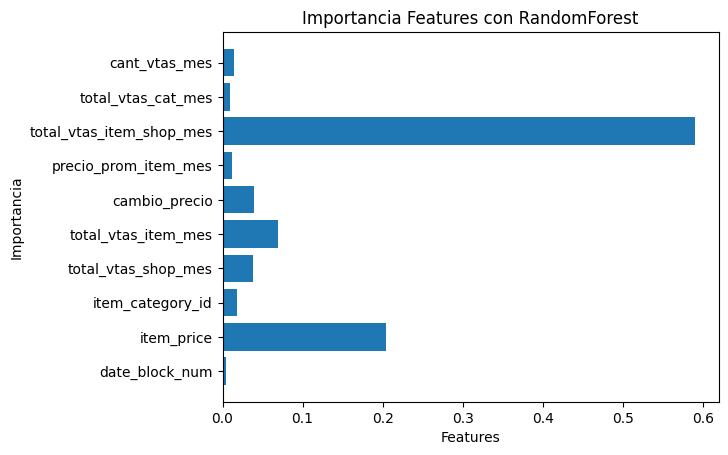

In [ ]:
# Importancia de features
model.feature_importances_

plt.barh(X_train.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RandomForest')
plt.show()

# Predicciones

## Armado de dataset de test

In [153]:
test = pd.read_csv('test.csv')

In [154]:
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [155]:
# se agrega date_block_num 34 (noviembre 2015)
test['date_block_num'] = 34

In [156]:
# se hace un merge con el df original con los datos disponibles en el df de test
test = test.merge(df[['shop_id', 'item_id', 'item_price', 'item_category_id', 'cambio_precio', 'total_vtas_shop_mes', 'total_vtas_item_mes',\
                      'precio_prom_item_mes', 'total_vtas_item_shop_mes', 'total_vtas_cat_mes', 'cant_vtas_mes']],\
                   on=['shop_id', 'item_id'], how='left')

In [157]:
# se deben rellenar los valores nan del df de test
test.isna().sum()

ID                               0
shop_id                          0
item_id                          0
date_block_num                   0
item_price                  102796
item_category_id            102796
cambio_precio               102796
total_vtas_shop_mes         102796
total_vtas_item_mes         102796
precio_prom_item_mes        102796
total_vtas_item_shop_mes    102796
total_vtas_cat_mes          102796
cant_vtas_mes               102796
dtype: int64

In [158]:
# se llenan los valores faltantes en 'item_price' con la moda (valor que mas se repite)
precio_mas_comun = df['item_price'].mode()[0]
test['item_price'].fillna(precio_mas_comun, inplace=True)

In [159]:
# se rellenan los valores faltantes en 'item_category_id' con el valor mas frcuente por item_id
item_category_id_moda = df.groupby('item_id')['item_category_id'].agg(lambda x: x.mode()[0]).reset_index()

# renombro la columna para poder hacer el merge
item_category_id_moda.columns = ['item_id', 'item_category_id_moda']

# hago el merge con test
test = test.merge(item_category_id_moda, on='item_id', how='left')

# se rellenan los valores faltantes en 'item_category_id' con la moda segun el item_id
test['item_category_id'].fillna(test['item_category_id_moda'], inplace=True)
test.drop(columns=['item_category_id_moda'], inplace=True)

# en caso de seguir teniendo datos faltantes se rellena con la moda general
moda_gral_item_category_id = df['item_category_id'].mode()[0]
test['item_category_id'].fillna(moda_gral_item_category_id, inplace=True)

In [160]:
# se rellena el campo 'total_vtas_shop_mes' con el valor que más se repite

# se calcula la media de ventas por tienda
moda_total_vtas_shop_mes = df.groupby('shop_id')['total_vtas_shop_mes'].agg(lambda x: x.mode()[0]).reset_index()
moda_total_vtas_shop_mes.columns = ['shop_id', 'moda_total_vtas_shop_mes']

# se hace el merge con test para añadir la moda de ventas por tienda
test = test.merge(moda_total_vtas_shop_mes, on='shop_id', how='left')

# se completan los valores faltantes en 'total_vtas_shop_mes' con la moda calculada
test['total_vtas_shop_mes'].fillna(test['moda_total_vtas_shop_mes'], inplace=True)

# se elimina la columna auxiliar
test.drop(columns=['moda_total_vtas_shop_mes'], inplace=True)

In [161]:
# se rellenan los datos de total_vtas_item_mes con el valor más frecuente

# se calcula la moda de ventas por ítem
moda_total_vtas_item_mes = df.groupby('item_id')['total_vtas_item_mes'].agg(lambda x: x.mode()[0]).reset_index()
moda_total_vtas_item_mes.columns = ['item_id', 'moda_total_vtas_item_mes']

# se hace el merge con test para añadir la moda de ventas por ítem
test = test.merge(moda_total_vtas_item_mes, on='item_id', how='left')

# se completan los valores faltantes en 'total_vtas_item_mes' con la moda calculada
test['total_vtas_item_mes'].fillna(test['moda_total_vtas_item_mes'], inplace=True)

# se borra la columna auxiliar
test.drop(columns=['moda_total_vtas_item_mes'], inplace=True)

# se calcula la moda de total_vtas_item_mes por categoría de ítem
moda_total_vtas_item_mes_por_categoria = df.groupby('item_category_id')['total_vtas_item_mes'].agg(lambda x: x.mode()[0]).reset_index()
moda_total_vtas_item_mes_por_categoria.columns = ['item_category_id', 'moda_total_vtas_item_mes_por_categoria']

# se hace un merge con test para agregar la moda de ventas por categoría de ítem
test = test.merge(moda_total_vtas_item_mes_por_categoria, on='item_category_id', how='left')

# se llenan los valores faltantes en 'total_vtas_item_mes' con la moda calculada por categoría
test['total_vtas_item_mes'].fillna(test['moda_total_vtas_item_mes_por_categoria'], inplace=True)

# se elimina la columna auxiliar
test.drop(columns=['moda_total_vtas_item_mes_por_categoria'], inplace=True)

# relleno valores faltantes con la moda general
mean_total_vtas_item_mes = df['total_vtas_item_mes'].agg(lambda x: x.mode()[0])
test['total_vtas_item_mes'].fillna(mean_total_vtas_item_mes, inplace=True)

In [162]:
# se rellenan los datos de cambio_precio con el valor más frecuente por categoria

# calculo la moda del cambio de precio por categoría de ítem

moda_cambio_precio_por_categ = df.groupby('item_category_id')['cambio_precio'].mean().reset_index()
moda_cambio_precio_por_categ.columns = ['item_category_id', 'moda_cambio_precio_por_categ']

# se hace el merge con test para agregar la media del cambio de precio por categoría de ítem
test = test.merge(moda_cambio_precio_por_categ, on='item_category_id', how='left')

# se rellenan los valores faltantes en 'cambio_precio' con la moda calculada por categoría
test['cambio_precio'].fillna(test['moda_cambio_precio_por_categ'], inplace=True)

# se borra la columna auxiliar
test.drop(columns=['moda_cambio_precio_por_categ'], inplace=True)


# en caso de seguir teniendo nan se rellena con la moda general
# se calcula la moda general de cambio_precio
moda_cambio_precio = df['cambio_precio'].mean()

# se completan los valores faltantes en 'cambio_precio' con la moda general
test['cambio_precio'].fillna(moda_cambio_precio, inplace=True)

In [163]:
# se rellenan los datos de cant_vtas_mes con el valor más frecuente
# se calcula la moda general de cant_vtas_mes
mean_cant_vtas_mes = df['cant_vtas_mes'].agg(lambda x: x.mode()[0])

# se rellenan los valores faltantes en 'cant_vtas_mes' con la moda general
test['cant_vtas_mes'].fillna(mean_cant_vtas_mes, inplace=True)

In [164]:
# se rellenan los datos de total_vtas_cat_mes con el valor más frecuente

# calculo la media general de total_vtas_cat_mes
moda_total_vtas_cat_mes = df['total_vtas_cat_mes'].agg(lambda x: x.mode()[0])

# relleno los valores faltantes en 'total_vtas_cat_mes' con la moda general
test['total_vtas_cat_mes'].fillna(moda_total_vtas_cat_mes, inplace=True)

In [165]:
# se rellenan los nan de precio_prom_item_mes con la moda de la categoria

# calculo la media de precio_prom_item_mes por categoría de ítem
moda_precio_prom_item_mes_por_categ = df.groupby('item_category_id')['precio_prom_item_mes'].agg(lambda x: x.mode()[0]).reset_index()
moda_precio_prom_item_mes_por_categ.columns = ['item_category_id', 'moda_precio_prom_item_mes_por_categ']

# se hace el merge con el df de test para añadir la media de precio promedio por categoría de ítem
test = test.merge(moda_precio_prom_item_mes_por_categ, on='item_category_id', how='left')

# se completan los valores faltantes en 'precio_prom_item_mes' con la moda calculada por categoría
test['precio_prom_item_mes'].fillna(test['moda_precio_prom_item_mes_por_categ'], inplace=True)

# se elimina la columna auxiliar
test.drop(columns=['moda_precio_prom_item_mes_por_categ'], inplace=True)

In [166]:
# se rellenan los nan de 'total_vtas_item_shop_mes' con la moda por categoria

# se calcula la moda de total_vtas_item_shop_mes por categoría de ítem
moda_total_vtas_item_shop_mes_por_cat = df.groupby('item_category_id')['total_vtas_item_shop_mes'].agg(lambda x: x.mode()[0]).reset_index()
moda_total_vtas_item_shop_mes_por_cat.columns = ['item_category_id', 'moda_total_vtas_item_shop_mes_por_cat']

# se hace el merge con test para añadir la media de precio promedio por categoría de ítem
test = test.merge(moda_total_vtas_item_shop_mes_por_cat, on='item_category_id', how='left')

# se rellenan los valores faltantes en 'total_vtas_item_shop_mes' con la moda calculada por categoría
test['total_vtas_item_shop_mes'].fillna(test['moda_total_vtas_item_shop_mes_por_cat'], inplace=True)

# se borra la columna auxiliar
test.drop(columns=['moda_total_vtas_item_shop_mes_por_cat'], inplace=True)

In [167]:
test['ID'] = test.index

In [168]:
test.head(3)

,ID,shop_id,item_id,date_block_num,item_price,item_category_id,cambio_precio,total_vtas_shop_mes,total_vtas_item_mes,precio_prom_item_mes,total_vtas_item_shop_mes,total_vtas_cat_mes,cant_vtas_mes
0,0,5,5037,34,2599.0,19.0,2580.070694,1359.0,209.0,2580.070694,1.0,5755.0,1131.0
1,1,5,5037,34,2599.0,19.0,-2.543380,1446.0,66.0,2569.619846,1.0,6153.0,1170.0
2,2,5,5037,34,1999.0,19.0,-495.641352,2136.0,233.0,2073.978495,2.0,10252.0,1827.0


## Predicción Noviembre 2015 (Regresor Lineal)

In [169]:
# se realiza la prediccion para noviembre
X_test = test[['date_block_num', 'item_price', 'item_category_id', 'total_vtas_shop_mes', 'total_vtas_item_mes',\
                  'cambio_precio', 'precio_prom_item_mes', 'total_vtas_item_shop_mes', 'total_vtas_cat_mes', 'cant_vtas_mes']]

# Realizar las predicciones
predict = model.predict(X_test)

# Añadir las predicciones al DataFrame
test['item_cnt_day'] = predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [170]:
# se verifica el tipo de salida requerido
sub = pd.read_csv('sample_submission.csv')
sub.head(3)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5


In [171]:
# se calculan las ventas mensuales por item
test['item_cnt_month'] = test.groupby(['item_id', 'shop_id', 'date_block_num'])['item_cnt_day'].transform('sum')

In [172]:
# se crea un df y se formatea con la salida deseada
resultado = test.copy()
resultado.drop_duplicates(subset=['item_id', 'shop_id', 'date_block_num', 'item_cnt_month'], keep='first', inplace=True)

resultado = resultado[['ID', 'item_cnt_month']]
resultado.reset_index(inplace=True)
resultado['ID'] = resultado.index
resultado.drop('index', axis=1, inplace=True)

resultado.head(5)

,ID,item_cnt_month
0,0,720.018522
1,1,54.682280
2,2,501.289401
3,3,54.682280
4,4,54.682280


In [173]:
resultado.count()

ID                214200
item_cnt_month    214200
dtype: int64

In [174]:
#guardo el resultado
resultado.to_csv('predicciones_noviembre.csv', index=False)

## Predicción Noviembre 2015 (Random Forest)

In [ ]:
# se realiza la prediccion para noviembre
X_test = test[['date_block_num', 'item_price', 'item_category_id', 'total_vtas_shop_mes', 'total_vtas_item_mes',\
                  'cambio_precio', 'precio_prom_item_mes', 'total_vtas_item_shop_mes', 'total_vtas_cat_mes', 'cant_vtas_mes']]

# Realizar las predicciones
predict = model.predict(X_test)

# Añadir las predicciones al DataFrame
test['item_cnt_day'] = predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# se verifica el tipo de salida requerido
sub = pd.read_csv('sample_submission.csv')
sub.head(3)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5


In [ ]:
# se calculan las ventas mensuales por item
test['item_cnt_month'] = test.groupby(['item_id', 'shop_id', 'date_block_num'])['item_cnt_day'].transform('sum')

In [ ]:
# se crea un df y se formatea con la salida deseada
resultado = test.copy()
resultado.drop_duplicates(subset=['item_id', 'shop_id', 'date_block_num', 'item_cnt_month'], keep='first', inplace=True)

resultado = resultado[['ID', 'item_cnt_month']]
resultado.reset_index(inplace=True)
resultado['ID'] = resultado.index
resultado.drop('index', axis=1, inplace=True)

resultado.head(5)

<ipython-input-137-144bd0aa19bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['ID'] = resultado.index
<ipython-input-137-144bd0aa19bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado.drop('index', axis=1, inplace=True)


,ID,item_cnt_month
0,0,720.018522
1,1,54.682280
2,2,501.289401
3,3,54.682280
4,4,54.682280


In [ ]:
resultado.count()

ID                214200
item_cnt_month    214200
dtype: int64

In [ ]:
#guardo el resultado
resultado.to_csv('predicciones_noviembre.csv', index=False)